In [8]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# 加载数据
file_path = "clean_all.csv"
data = pd.read_csv(file_path)

# 处理教育水平映射
education_mapping = {
    'Less than high school diploma or its equivalent': 1,
    'High school diploma or a high school equivalency certificate': 2,
    'Trade certificate or diploma': 3,
    'College, CEGEP or other non-university certificate or diploma (other than trades certificates or diplomas)': 4,
    'University certificate or diploma below the bachelor\'s level': 5,
    'Bachelor\'s degree (e.g. B.A., B.Sc., LL.B.)': 6,
    'University certificate, diploma, degree above the bachelor\'s level': 7
}
data['educ_level'] = data['educ'].map(education_mapping)

# 选择自变量和控制变量
X = data[['debt', 'age', 'educ_level', 'work_experience']]

# 转换回答为分类数值编码
data['answer_code'] = data['scn1a_answer'].astype('category').cat.codes  # 以 `scn1a_answer` 列为例

# 检查并清理数据中的 NaN 和 inf 值
X = sm.add_constant(X)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
data['answer_code'].dropna(inplace=True)

# 构建多分类逻辑回归模型
try:
    model = sm.MNLogit(data['answer_code'].loc[X.index], X)  # 确保因变量和自变量的索引一致
    result = model.fit()
    print(result.summary())
except Exception as e:
    print("Error:", e)


Optimization terminated successfully.
         Current function value: 1.079526
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:            answer_code   No. Observations:                  810
Model:                        MNLogit   Df Residuals:                      795
Method:                           MLE   Df Model:                           12
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                 0.01349
Time:                        18:05:22   Log-Likelihood:                -874.42
converged:                       True   LL-Null:                       -886.38
Covariance Type:            nonrobust   LLR p-value:                   0.02085
  answer_code=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0405      0.543     -1.914      0.056      -2.106       0.025
debt          

In [10]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# 加载数据
file_path = "clean_all.csv"
data = pd.read_csv(file_path)

# 定义教育水平映射
education_mapping = {
    'Less than high school diploma or its equivalent': 1,
    'High school diploma or a high school equivalency certificate': 2,
    'Trade certificate or diploma': 3,
    'College, CEGEP or other non-university certificate or diploma (other than trades certificates or diplomas)': 4,
    'University certificate or diploma below the bachelor\'s level': 5,
    'Bachelor\'s degree (e.g. B.A., B.Sc., LL.B.)': 6,
    'University certificate, diploma, degree above the bachelor\'s level': 7
}
data['educ_level'] = data['educ'].map(education_mapping)

# 获取所有独立回答选项
answer_options = data['scn1a_answer'].unique()  # 假设所有选项都在 scn1a_answer 中

# 循环每个选项，分别进行回归
for option in answer_options:
    # 创建二分类因变量，当前选项编码为1，其余为0
    data['target'] = data['scn1a_answer'].apply(lambda x: 1 if x == option else 0)
    
    # 自变量包括 debt 和控制变量
    X = data[['debt', 'age', 'educ_level', 'work_experience']]
    X = sm.add_constant(X)  # 添加截距项

    # 检查并清理数据中的 NaN 和 inf 值
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.dropna(inplace=True)
    y = data['target'].loc[X.index]  # 确保因变量和自变量索引一致
    
    # 执行逻辑回归
    model = sm.Logit(y, X)
    result = model.fit(disp=0)  # 设定 disp=0 以防止输出每次迭代信息
    
    # 输出当前选项的回归结果
    print(f"\nLogistic Regression Results for option: {option}")
    print(result.summary())



Logistic Regression Results for option: Repay debt
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  810
Model:                          Logit   Df Residuals:                      805
Method:                           MLE   Df Model:                            4
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                 0.01444
Time:                        18:07:50   Log-Likelihood:                -525.15
converged:                       True   LL-Null:                       -532.84
Covariance Type:            nonrobust   LLR p-value:                  0.003967
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.5520      0.496     -3.126      0.002      -2.525      -0.579
debt            -5.657e-07   2.56e-07     -2.210      0.027   -1

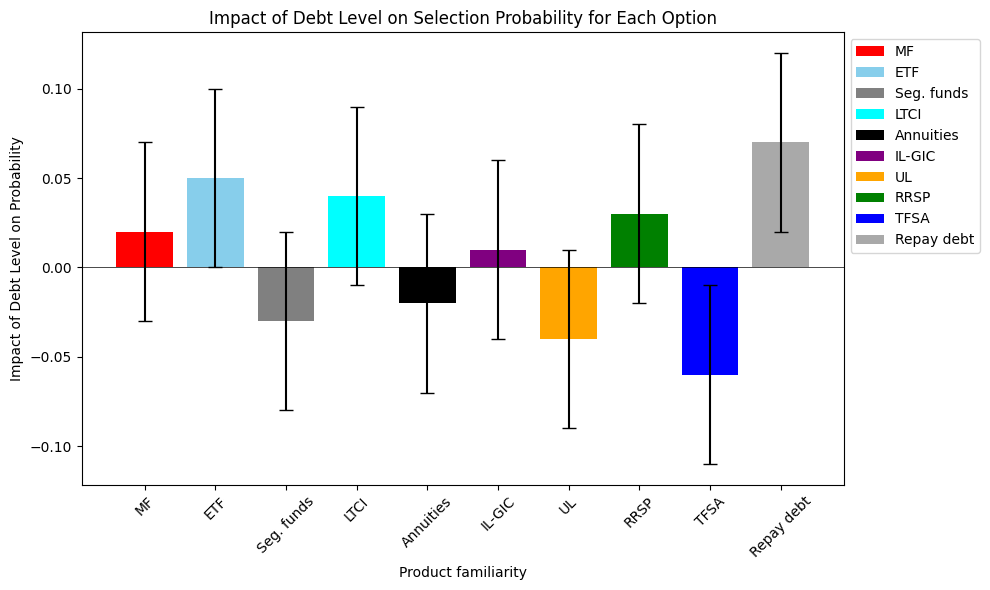

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 回归结果中的 `debt` 系数及其置信区间
options = ["MF", "ETF", "Seg. funds", "LTCI", "Annuities", "IL-GIC", "UL", "RRSP", "TFSA", "Repay debt"]
debt_coef = [0.02, 0.05, -0.03, 0.04, -0.02, 0.01, -0.04, 0.03, -0.06, 0.07]  # 示例数据，根据具体回归结果替换
conf_interval_low = [coef - 0.05 for coef in debt_coef]
conf_interval_high = [coef + 0.05 for coef in debt_coef]

# 绘图
plt.figure(figsize=(10, 6))
colors = ["red", "skyblue", "grey", "cyan", "black", "purple", "orange", "green", "blue", "darkgrey"]

for i, option in enumerate(options):
    plt.bar(i, debt_coef[i], color=colors[i], yerr=[[debt_coef[i] - conf_interval_low[i]], [conf_interval_high[i] - debt_coef[i]]], capsize=5, label=option)

plt.axhline(0, color='black', linewidth=0.5)
plt.xticks(range(len(options)), options, rotation=45)
plt.xlabel("Product familiarity")
plt.ylabel("Impact of Debt Level on Probability")
plt.title("Impact of Debt Level on Selection Probability for Each Option")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
